<a href="https://colab.research.google.com/github/nicsim22/DS110-Content/blob/main/Lecture21DataStructures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Structures

*Bleeding Nail Disease was now beginning to spread in the United States, with affected towns entering lockdown.  One of Cynthia's colleagues had managed to hack into Homeland Security, and there she had found an intriguing file - what appeared to be a history of who contracted the disease from whom in a small Midwestern town.*

*Cynthia had some analysis she wanted to run on this data, but first, what kind of data structure should she use to hold the data?  Each patient had one person they contracted the disease from, and potentially many people they gave it to....*

*Of course!  The data formed a "tree."  Cynthia immediately went looking for algorithms that specifically analyzed trees.*

**"Data structures" refer to objects that hold more data.**  Our familiar lists and dictionaries are data structures.  But it's good to be able to...

* Create your own new data structures that suit your own needs
* Better understand what is happening "under the hood" of familiar data structures

A key idea that will make all of this work is that when an object has an attribute that is an object, that attribute conceptually creates a "link" to the other object, which we might draw as an arrow.  These links "hold together" complex multi-part data structures, in which each piece of the data structure is itself an object.

# Linked Lists

We won't spend too long on linked lists, because Python already gives us a perfectly good list implementation (that is not a linked list).  Still, these are often used as "my first data structure" in CS instruction, because they're about as simple as you can make a data structure that uses references as links.

//python usually does not need linked lists, but they are kind of a stepping stone to trees, which are lists but with more stuff//


Here's our model of a linked list with 3 nodes:
<img src = " 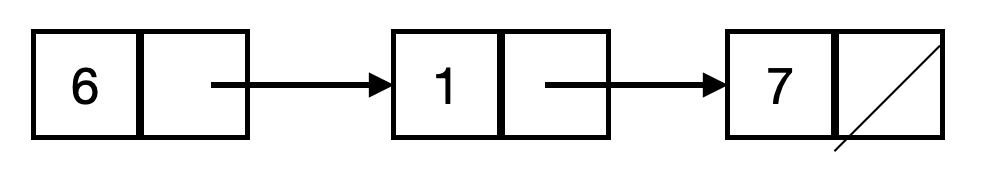">

//slash in square above means nothing next, in python, represented by node3.next = None //

Something that you might find surprising is that we just define the class of the individual "nodes", and don't create a separate class for the list.  To know where the first node in line is, is to know where the whole list is.  **Each node knows the location of the next node.** The last knows there is none after it.

In [ ]:
class ll_node:
  def __init__(self, num):
    self.number = num
    self.next = None

  def append(self, num):
    if self.next == None:     # End of the list - add the node #if we are at the end of the list --> this is base case
      self.next = ll_node(num)
    else:
      self.next.append(num) # Recursively append to rest of list

  def contains(self, othernum): #check whether smth is in the list
    if self.number == othernum:  # if we found it
      return True
    elif self.next == None:  # We reached the end, didn't find it
      return False #base case either True above, or False
    # Not here, there's more list - so, keep looking (recursively)
    return self.next.contains(othernum) #if not base case, use recursion

  def __str__(self): #override string so that it prints correctly instead of object.smth
    if self.next == None:  # Last number
        return str(self.number)
    # Print this and print the rest (more recursion)
    return str(self.number) + ' ' + str(self.next)

In [ ]:
mylist = ll_node(6)
mylist.append(1) #recursively goes to end of list and adds 1
mylist.append(7) #recursively goes to end of list and adds 7
print(mylist)
print('Contains 7: ' + str(mylist.contains(7)))
print('Contains 5: ' + str(mylist.contains(5)))

6 1 7
Contains 7: True
Contains 5: False


We don't plan to use linked lists for much in this course, with Python lists so handy - it's more like a warmup for trees - but there are a few useful points here:

* Our class defines a building block - the **"next" attribute links it to the next node in the series**.  We don't need a bigger container for everything.  Custom data structures can be like that, just defining the nodes to be linked.
* Recursion is often a good fit for custom data structures linked like this.  Do something to the current node, then do something to the structures it links to.

# Python lists:  dynamic arrays

How does a Python list work, if it's not a linked list?  **It's secretly an array, the better to quickly access its elements**.  The array actually has a particular size in memory, and can fill up.  When it runs out of space, the list must copy its elements to a new, bigger array.  The following code illustrates how a Python list works.

In [ ]:
import numpy as np

class dynamic_array:  # Showing how Python lists work
  def __init__(self, initial_size):
    self.memory = np.zeros(initial_size)
    self.occupied = 0
    self.size = initial_size

  def __str__(self):
    return str(self.memory)

  def append(self, val):
    if self.occupied == self.size: #if list is full, gotta resize and copy items from original list into it
      print('Resizing...')
      new_memory = np.zeros(self.size*2)
      # A "hiccup" in running time as everything's copied
      for i in range(len(self.memory)):
        new_memory[i] = self.memory[i]
      self.memory = new_memory
      self.size = self.size*2
    print('Adding ' + str(val))
    self.memory[self.occupied] = val
    self.occupied += 1

my_array = dynamic_array(2) #actl python array has space for more than 2 items, not so small
print(my_array)
my_array.append(1)
my_array.append(1)
print(my_array)
my_array.append(1)
print(my_array)
my_array.append(1)
print(my_array)

[0. 0.]
Adding 1
Adding 1
[1. 1.]
Resizing...
Adding 1
[1. 1. 1. 0.]
Adding 1
[1. 1. 1. 1.]


# Trees

A tree node is like a **linked list node** with **multiple "next" nodes**, called "children" in this context.  Nodes pointing to children are their "parents."  The node with no parent at the top is the "**root**."  The nodes with no children are "**leaves**."

<img src=" 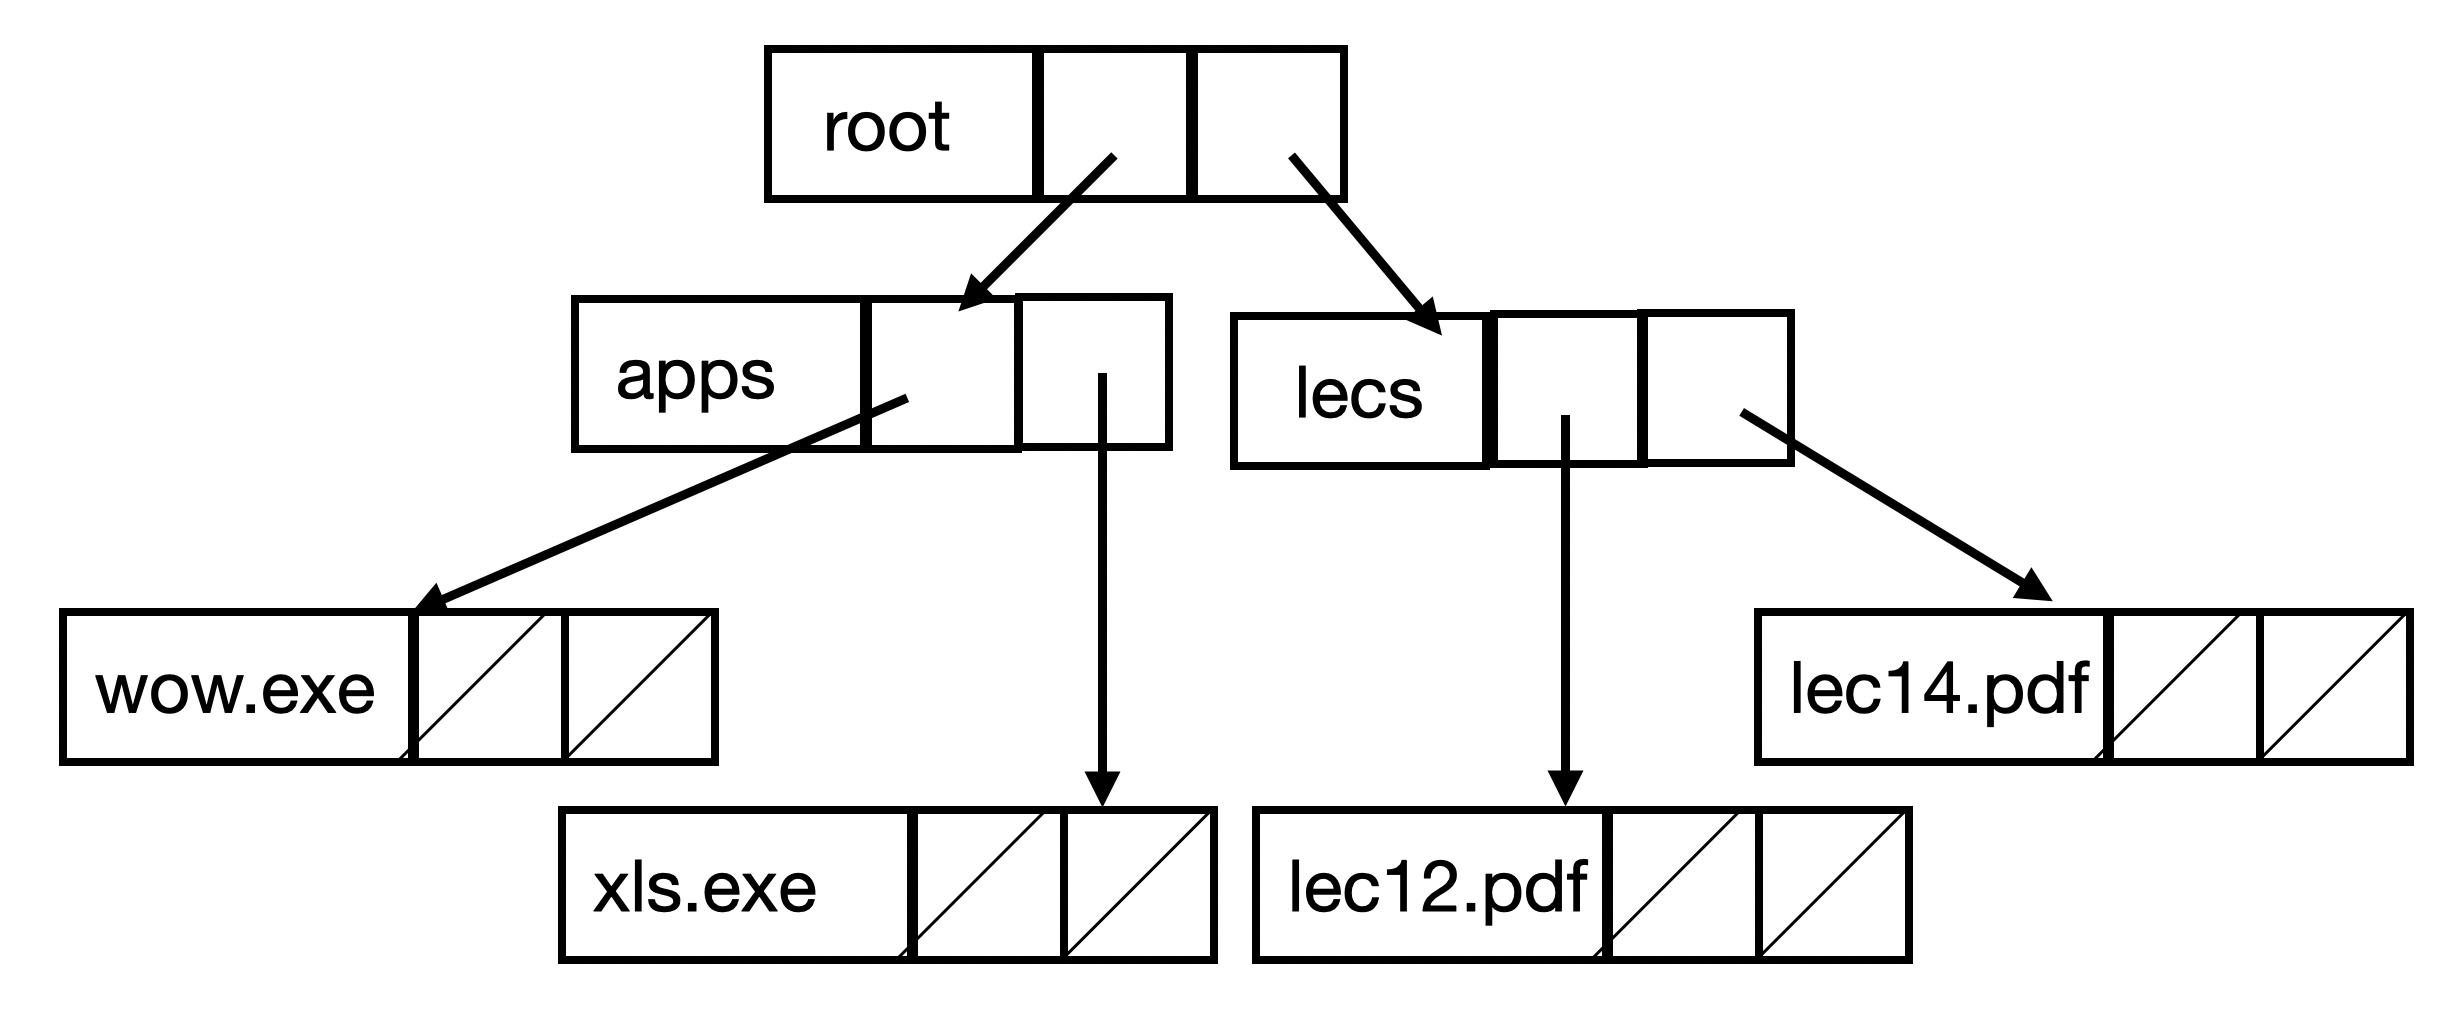">



Trees can serve a variety of purposes in code, like:

* Representing **files and folders** - children are contained in parent folders
* Representing a **hierarchy** in an organization
* Representing possible **sequences of actions**, like in a game
* Forming the basis for specific fast data structures (like "heaps")
* Representing a **decision process** for an AI/Machine Learning system

Here is how to implement a "binary tree", a tree that specifically **limits the number of children per node to two**.  This is typically how decision trees used in machine learning are implemented (see later in the course).

In [ ]:
class FolderTree:
  # binary left and right are its fields
  def __init__(self, val):
    self.left = None #None, so that can pass in value to store at node
    self.right = None
    self.val = val

  def addLeft(self, node): #left or right instead of just next
    self.left = node

  def addRight(self, node):
    self.right = node

  def find(self, v):
    if self.val == v:
      return True
    # "if self.left" is checking that self.left exists -
    # else error when we run self.left.find()
    if self.left and self.left.find(v): #check if left exists first, if left is not None (if self.left not None), conditions evaluate left to right #check if it is down the left branch somewhere
      return True
    if self.right and self.right.find(v): # #check if it is down the right branch somewhere
      return True
    return False #if no left and no right, aka no where in the tree, will return False

In [ ]:
# Constructing a sample tree
#      root
#    /     \
#  apps     lecs
#  /  \       /  \
# wow xls  lec12  lec14
# Children of the left child of the root
leftleftchild = FolderTree("wow.exe")
leftrightchild = FolderTree("xls.exe")
# Children of the right child of the root
rightleftchild = FolderTree("lec12.pdf")
rightrightchild = FolderTree("lec14.pdf")
# Children of the root
leftparent = FolderTree("apps")
rightparent = FolderTree("lecs")
leftparent.addLeft(leftleftchild)
leftparent.addRight(leftrightchild)
rightparent.addLeft(rightleftchild)
rightparent.addRight(rightrightchild)
# The root
root = FolderTree("root")
root.addLeft(leftparent)
root.addRight(rightparent)

print(root.find("wow.exe")) #is wow.exe in root?
print(root.find("lec13.exe"))

True
False


Incidentally, you'll notice that find() is recursive.  Recursion is a very natural way to do things with trees, and various tasks like **counting all the nodes in the tree** or **determining the depth of the tree** (the maximum distance to the root) are most easily performed with recursion.

In [ ]:
def count_nodes(tree):
    if tree == None:
        return 0 #base case --> stop recursion if there is None
    return 1 + count_nodes(tree.left) + count_nodes(tree.right) #count all left branch then right branch, and 1 for the root

count_nodes(root)

7

In [ ]:
# The depth of a tree is the distance of the furthest leaf
# from the root
def calc_depth(tree):
    if tree is None: #empty tree
        return 0
    if tree.left is None and tree.right is None: #if reach leaf where there is no left or right child, and if that is considered its own tree
        return 0  # Leaf has depth 0 in its subtree
    return 1 + max(calc_depth(tree.left), calc_depth(tree.right)) #see which side is longer

calc_depth(root)

2

The above implementation of find() leaves a little something to be desired in terms of efficiency, because the whole tree needs to be searched.  If we instead require that all values to the left of a node be less than its key, and all values to the right are greater, then we get a "binary search tree," and the running time gets very good as long as the tree is also roughly balanced.

In [ ]:
class BinarySearchTree:
  # binary left and right are its fields
  def __init__(self, val):
    self.left = None
    self.right = None
    self.val = val

  def addLeft(self, node):
    self.left = node

  def addRight(self, node):
    self.right = node

  def find(self, v): #find implementation works differently here, more than value on right, less than value on left, applies to all branches and nodes
    if self.val == v:
      return True
    if v < self.val:
      if self.left:
        print("Going Left")
        return self.left.find(v)
      else:
        return False
    else:
      if self.right:
        print("Going Right")
        return self.right.find(v)
      else:
        return False

# Tree structure:
#       m
#     f   q
#    a h o u
root = BinarySearchTree("m")
leftparent = BinarySearchTree("f")
rightparent = BinarySearchTree("q")
leftleftchild = BinarySearchTree("a")
leftrightchild = BinarySearchTree("h")
rightleftchild = BinarySearchTree("o")
rightrightchild = BinarySearchTree("u")
leftparent.addLeft(leftleftchild)
leftparent.addRight(leftrightchild)
rightparent.addLeft(rightleftchild)
rightparent.addRight(rightrightchild)
root.addLeft(leftparent)
root.addRight(rightparent)

print(root.find("h"))
print(root.find("d"))

Going Left
Going Right
True
Going Left
Going Left
False


The tree is superficially similar, but only one of the recursive calls happens to a node on a given search (at most), and only one path to the file is explored instead of the whole tree.

Binary search trees illustrate the broader principle that a little bit of organization in the data can make the code a lot faster.  (Here the speed of the search grows logarithmically with the number of items, as long as the tree is roughly balanced.  "Logarithmically" is the opposite of "exponentially.")

# Cynthia's analysis

As a last example, we can illustrate how to handle **more than two children**.  You just need a data structure that can store more than two items; a list will do fine.

In [ ]:
class infect_tree:
    # name is a string, infects is a list of infect_tree's infected
    def __init__(self, name, infects):
        self.name = name
        self.infects = infects

#         alice
#        /  |   \
#      bob  che  daphne_______
#      |       /    |    \    \
#      eric   fifi  ged  hao  idris
#                               |
#                             jake

# Bottom levels
jake = infect_tree('jake', [])
eric = infect_tree('eric', [])
fifi = infect_tree('fifi', [])
ged = infect_tree('ged', [])
hao = infect_tree('hao', [])
idris = infect_tree('idris', [jake])
# Children of the root
bob = infect_tree('bob', [eric])
che = infect_tree('che', [])
daphne = infect_tree('daphne', [fifi, ged, hao, idris])
# Root
alice = infect_tree('alice', [bob, che, daphne])

One kind of analysis we could run is, who infected the most people in the tree?

In [ ]:
def find_most_infections(my_tree):
    best_infects = len(my_tree.infects)
    best_name = my_tree.name
    for infect in my_tree.infects:
        name, infects = find_most_infections(infect) # Recursion...
        if infects > best_infects:
            best_infects = infects
            best_name = name
    return best_name, best_infects

find_most_infections(alice)

('daphne', 4)

We may want to follow up with, can we get a list of everybody who was directly or indirectly infected through that person?

In [ ]:
def find_all_descendants(my_tree):
    my_list = [my_tree.name]
    for infect in my_tree.infects:
        my_list += find_all_descendants(infect)  # More recursion
    return my_list

find_all_descendants(daphne)

['daphne', 'fifi', 'ged', 'hao', 'idris', 'jake']

These are just examples - it's tough to fully justify trees at this stage, because they're often used in more complex algorithms that we can't go into.  We'll cover one such algorithm, the machine learning approach known as decision trees, later in this course.